[Source](https://www.youtube.com/watch?v=IQhh6myW6Fw)

### KNN Wine Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [2]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df['target'] = wine['target']

In [4]:
df.shape

(178, 14)

In [5]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### Test Train Split

In [6]:
X = df
y = X.pop('target')

In [7]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
X.shape

(178, 13)

In [9]:
y.unique()

array([0, 1, 2])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Train Classifier

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7592592592592593

### Tunning sensitivity of model to ``n_neighbors``

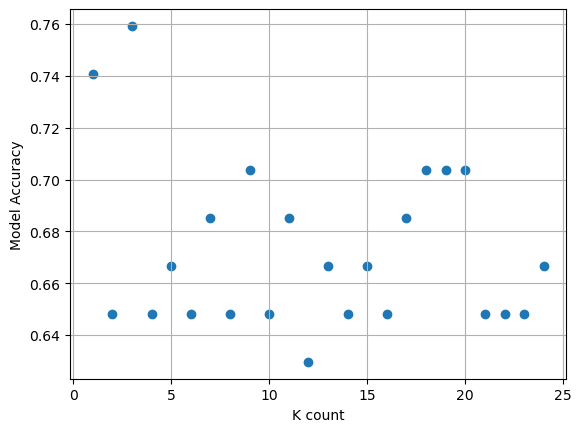

In [46]:
k_range = range(1, 25)
scores = []

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors = k)
	knn.fit(X_train, y_train)
	scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('K count')
plt.ylabel('Model Accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 25])
plt.show()

Text(0, 0.5, 'Accuracy')

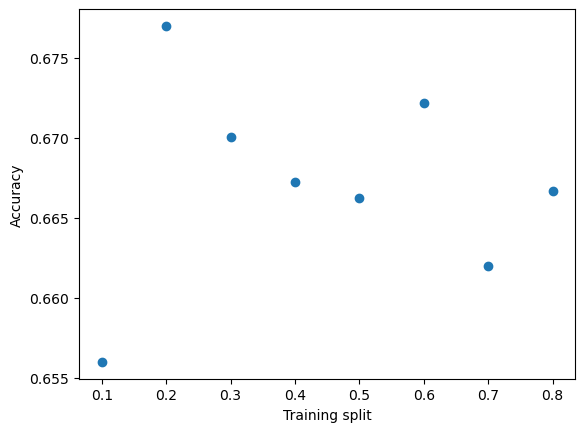

In [23]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors = 2)

plt.figure()

for test_size in test_sizes:
	scores = []
	
	for i in range(1, 100):
		X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - test_size)
		knn.fit(X_train, y_train)
		scores.append(knn.score(X_test, y_test))
	plt.scatter(test_size, np.mean(scores), color = 'tab:blue')
		
plt.xlabel('Training split')
plt.ylabel('Accuracy')

### Make predictions

In [47]:
prediction = knn.predict(X_test)
prediction

array([0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 2, 2])

In [48]:
y_test

15     0
134    2
87     1
136    2
151    2
100    1
27     0
116    1
34     0
157    2
176    2
143    2
81     1
53     0
113    1
150    2
22     0
46     0
169    2
28     0
115    1
170    2
175    2
107    1
67     1
93     1
99     1
159    2
66     1
121    1
8      0
108    1
111    1
129    1
148    2
158    2
141    2
12     0
73     1
76     1
171    2
9      0
80     1
131    2
132    2
64     1
102    1
57     0
26     0
92     1
19     0
123    1
101    1
130    2
Name: target, dtype: int64

In [49]:
cm = confusion_matrix(y_test, prediction)
cm

array([[13,  0,  0],
       [ 1, 17,  5],
       [ 3,  9,  6]])

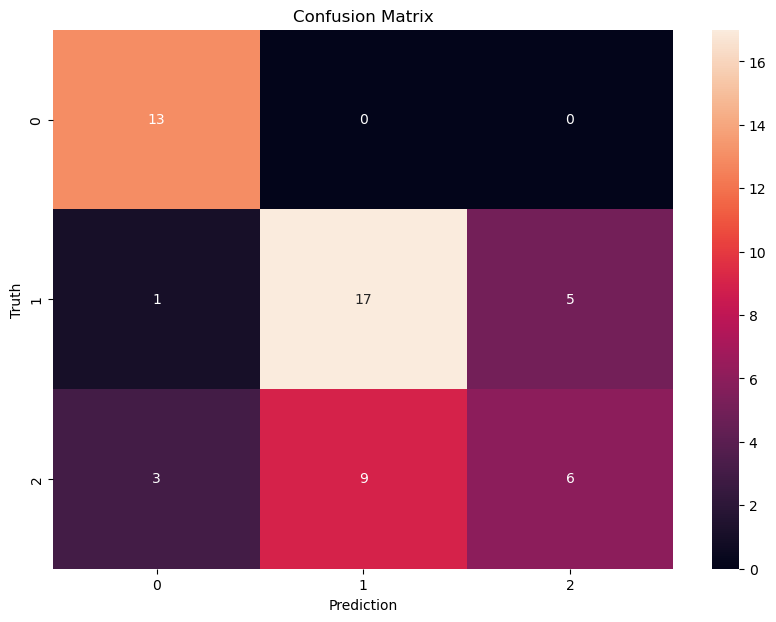

In [50]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()